<center><h1><b>ĐỒ ÁN: EEDI - MINING MISCONCEPTIONS IN MATHEMATICS</b></h1><center>

<center><h2><u>Môn:</u> Học sâu cho Khoa học dữ liệu - <u>Lớp:</u> 21_21</h2></center>

<h3><u>Giáo viên hướng dẫn:</u><h3>

- TS. Nguyễn Tiến Huy
- TS. Lê Thanh Tùng
- ThS. Nguyễn Trần Duy Minh  

<h3><u>Nhóm thực hiện:</u> Nhóm 1</h3>

| Họ và tên | MSSV |
| :--- | :---:|
| Phạm Nhật Duy | 21120058 |
| Nguyễn Trúc Nguyên | 21120102 |
| Trương Công Trung | 21120158 |
| Lê Trần Minh Khuê | 21120279 |


# **Tổng quan**
<u>Trong phạm vi đồ án này</u>, nhóm chúng em sẽ phát triển một mô hình học máy cung cấp khả năng phân tích và dự đoán mối liên hệ giữa *các ngộ nhận* với *các câu trả lời không chính xác* trong các câu hỏi trắc nghiệm.

<u>Mục tiêu:</u> Đối với mỗi câu hỏi trắc nghiệm, mô hình sẽ

- Xác định được câu trả lời đúng,
- Xác định được những lầm tưởng/ ngộ nhận có thể dẫn đến việc chọn đáp án sai.

<u>Trong phạm vi file này</u>, nhóm sẽ tiến hành tìm hiểu dữ liệu và phân tích dữ liệu huấn luyện, bước đầu tiếp cận và hiểu về các thuộc tính và phân bố của các giá trị, bao gồm:

1. Đọc và quan sát dữ liệu
2. Tìm hiểu tổng quát về dữ liệu
3. Kiểm tra giá trị và phân bố của dữ liệu
4. Trực quan hoá



> ***Misconception***.   
>
> Trong phạm vi file này, một số nhận xét/ phân tích sẽ giữ nguyên từ 'misconception' (trong ngữ cảnh chỉ về "các cột misconception..Id"), một số khác em xin phép *quy ước* dịch 'misconception' là ngộ nhận (trong ngữ cảnh phân tích dữ liệu về bài toán).  
>
> (một số cách dịch khác như quan niệm sai lầm, nhầm lẫn, hiểu lầm,... có thể được sử dụng ở các file khác tuỳ vào ngữ cảnh.)

# **Tìm hiểu và phân tích dữ liệu**

## 0. Gọi các thư viện cần thiết

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

## 1. Đọc dữ liệu
Đọc dữ liệu đã được tải về từ cuộc thi



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Đọc dữ liệu từ file train.csv
data = pd.read_csv('/content/drive/MyDrive/Last dance/Deep learning/Project/discovery + preprocessing/data/train.csv')

if not data.empty:
    print("Dữ liệu huấn luyện đã được đọc thành công.")
else:
    print("Dữ liệu huấn luyện trống.")

# Đọc dữ liệu từ file test.csv
test = pd.read_csv('/content/drive/MyDrive/Last dance/Deep learning/Project/discovery + preprocessing/data/test.csv')

if not test.empty:
    print("Dữ liệu kiểm tra đã được đọc thành công.")
else:
    print("Dữ liệu kiểm tra trống.")


# Đọc dữ liệu từ file misconception_mapping.csv
mis_map = pd.read_csv('/content/drive/MyDrive/Last dance/Deep learning/Project/discovery + preprocessing/data/misconception_mapping.csv')
mis_map = mis_map.astype(object)
if not mis_map.empty:
    print("Dữ liệu misconception đã được đọc thành công.")
else:
    print("Dữ liệu misconception trống.")

Dữ liệu huấn luyện đã được đọc thành công.
Dữ liệu kiểm tra đã được đọc thành công.
Dữ liệu misconception đã được đọc thành công.


## 2. Quan sát tổng thể

Trước khi bắt đầu khám phá về các mối quan hệ của dữ liệu, nhóm em sẽ tiến hành quan sát và tìm hiểu các thuộc tính hiện có của dữ liệu.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QuestionId        1869 non-null   int64  
 1   ConstructId       1869 non-null   int64  
 2   ConstructName     1869 non-null   object 
 3   SubjectId         1869 non-null   int64  
 4   SubjectName       1869 non-null   object 
 5   CorrectAnswer     1869 non-null   object 
 6   QuestionText      1869 non-null   object 
 7   AnswerAText       1869 non-null   object 
 8   AnswerBText       1869 non-null   object 
 9   AnswerCText       1869 non-null   object 
 10  AnswerDText       1869 non-null   object 
 11  MisconceptionAId  1135 non-null   float64
 12  MisconceptionBId  1118 non-null   float64
 13  MisconceptionCId  1080 non-null   float64
 14  MisconceptionDId  1037 non-null   float64
dtypes: float64(4), int64(3), object(8)
memory usage: 219.2+ KB


Dữ liệu có 1869 dòng, với tổng số 15 cột. Tiếp tục, quan sát vài dòng của dữ liệu:

In [ ]:
data.head(1)

,QuestionId,ConstructId,ConstructName,SubjectId,SubjectName,CorrectAnswer,QuestionText,AnswerAText,AnswerBText,AnswerCText,AnswerDText,MisconceptionAId,MisconceptionBId,MisconceptionCId,MisconceptionDId
0,0,856,Use the order of operations to carry out calculations involving powers,33,BIDMAS,A,\[\n3 \times 2+4-5\n\]\nWhere do the brackets need to go to make the answer equal \( 13 \) ?,\( 3 \times(2+4)-5 \),\( 3 \times 2+(4-5) \),\( 3 \times(2+4-5) \),Does not need brackets,NaN,NaN,NaN,1672.0


In [ ]:
data.sample()

,QuestionId,ConstructId,ConstructName,SubjectId,SubjectName,CorrectAnswer,QuestionText,AnswerAText,AnswerBText,AnswerCText,AnswerDText,MisconceptionAId,MisconceptionBId,MisconceptionCId,MisconceptionDId
198,198,2074,Convert from km² to m²,196,Area Units,B,\( 2 \mathrm{~km}^{2} \) is the same as _____ \( m^{2} \),\( 2000 \),\( 2000000 \),\( 20000 \),\( 2000000000 \),486.0,NaN,2132.0,1230.0


Có thể thấy, bộ dữ liệu hiện có gồm 15 cột chứa thông tin về các câu hỏi trắc nghiệm và khái niệm liên quan đến câu hỏi đó, cùng với các câu trả lời. Tất cả dữ liệu được viết bằng tiếng Anh. Cụ thể từng cột như sau:

| STT | Thuộc tính | Mô tả |
|:---|:---|:---|
|  1 | `QuestionId` | Mã câu hỏi (int) |
|  2 | `ConstructId` | Mã khái niệm (int) |
|  3 | `ConstructName` | Khái niệm - Mức độ kiến thức chi tiết nhất liên quan tới câu hỏi(str) |
|  4 | `CorrectAnswer` | Đáp án đúng (A, B, C, D) (char) |
|  5 | `SubjectId` | Mã môn học (int) |
|  6 | `SubjectName` | Tên môn học (str) |
|  7 | `QuestionText` | Câu hỏi dạng văn bản (str) |
|  8 | `AnswerAText` | Đáp án A dạng văn bản (str) |
|  9 | `AnswerBText` | Đáp án B dạng văn bản (str) |
| 10 | `AnswerCText` | Đáp án C dạng văn bản (str) |
| 11 | `AnswerDText` | Đáp án D dạng văn bản (str) |
| 12 | `MisconceptionAId` | Mã ngộ nhận tương ứng với đáp án A - nếu có (int) |
| 13 | `MisconceptionBId` | Mã ngộ nhận tương ứng với đáp án B - nếu có (int) |
| 14 | `MisconceptionCId` | Mã ngộ nhận tương ứng với đáp án C - nếu có (int) |
| 15 | `MisconceptionDId` | Mã ngộ nhận tương ứng với đáp án D - nếu có (int) |

## 3. Kiểm tra giá trị và phân bố của dữ liệu

### 3.1 Kiểm tra số lượng dữ liệu thiếu (NaN) của các cột

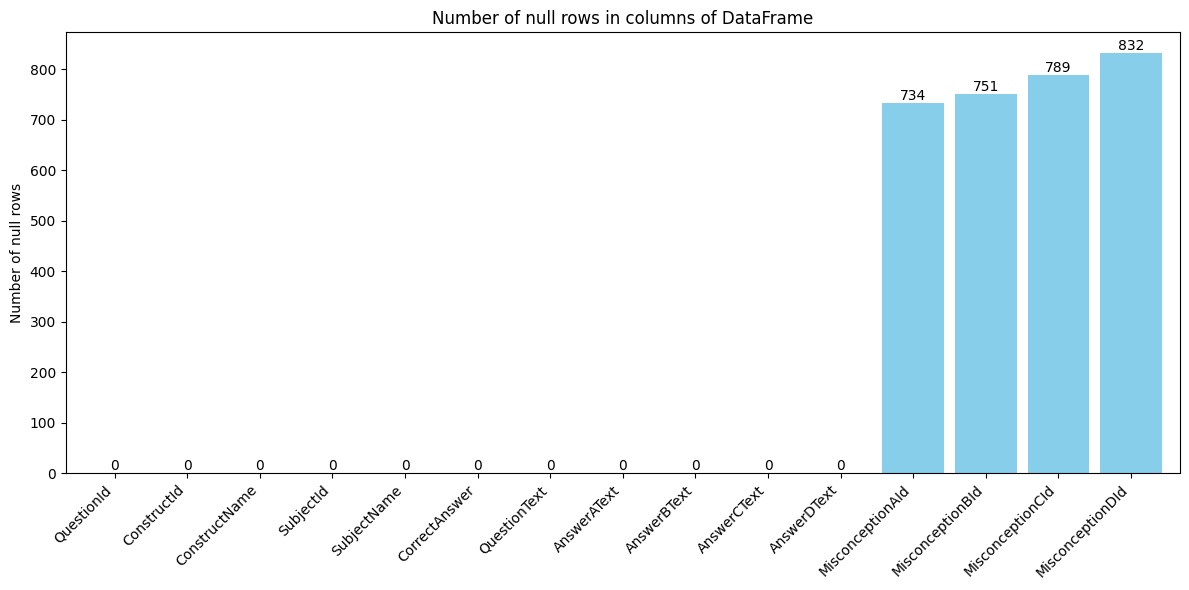

In [ ]:
null_counts = data.isnull().sum()

plt.figure(figsize=(12, 6))
ax = null_counts.plot(kind='bar', color='skyblue', width= 0.85)
for i, v in enumerate(null_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)
plt.title('Number of null rows in columns of DataFrame')
plt.ylabel('Number of null rows')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.tight_layout()
plt.show()

***Nhận xét:***

- Chỉ có các cột Misconception bị `NaN`
 $\rightarrow$ Các giá trị null này có thể là không có ngộ nhận, hoặc đây là đáp án đúng, hoặc là lỗi cơ bản, không liên quan đến bất kỳ ngộ nhận hay hiểu lầm nào về khái niệm.

Tiến hành kiểm tra xem bao nhiêu 'misconception' `NaN` là đáp án đúng, và phần còn lại là bao nhiêu.

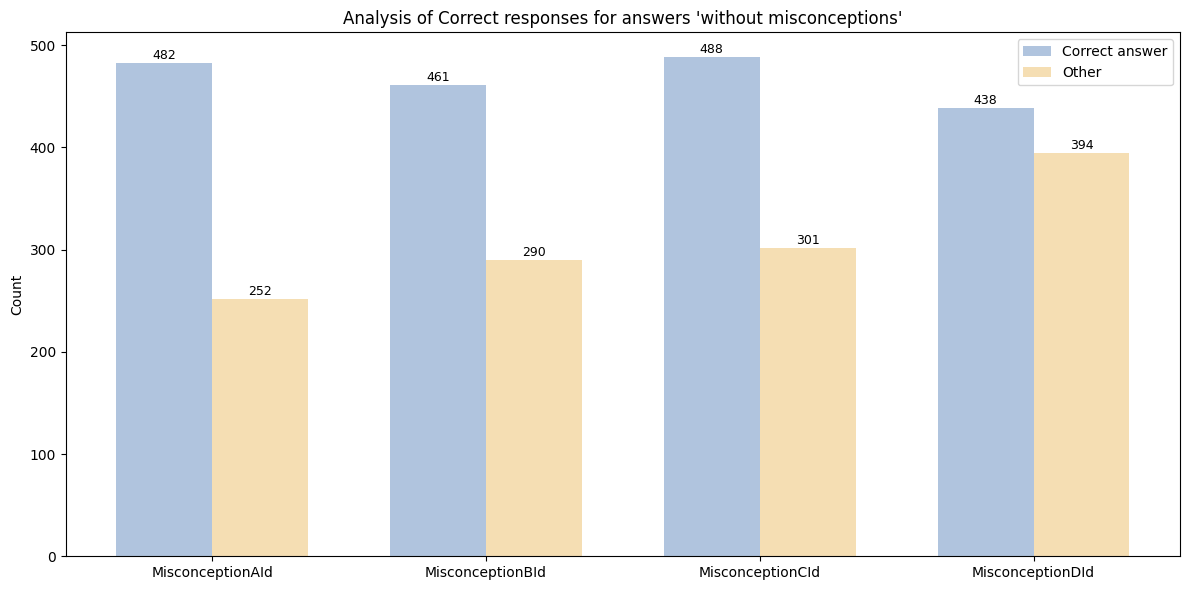

In [ ]:
result = pd.DataFrame(columns=['MisconceptionId', 'CorrectAnswer', 'Other'])

# Duyệt qua các cột MisconceptionAId, MisconceptionBId, MisconceptionCId, MisconceptionDId
for col in ['MisconceptionAId', 'MisconceptionBId', 'MisconceptionCId', 'MisconceptionDId']:
    # Lọc các hàng có giá trị NaN trong cột hiện tại
    na_rows = data[data[col].isna()]
    # Đếm số lượng correctAnswer tương ứng với cột hiện tại
    correct_answer_count = na_rows[na_rows['CorrectAnswer'] == col[13:14]].shape[0]
    other_count = na_rows.shape[0] - correct_answer_count

    result = pd.concat([result, pd.DataFrame({'MisconceptionId': [col]
                                              , 'CorrectAnswer': [correct_answer_count]
                                              , 'Other': [other_count]})], ignore_index=True)

# Trực quan kết quả
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(result))

# Vẽ biểu đồ cột cho CorrectAnswer
plt.bar(index, result['CorrectAnswer'], bar_width, label='Correct answer', color='lightsteelblue')

# Vẽ biểu đồ cột cho Other
plt.bar(index + bar_width, result['Other'], bar_width, label='Other', color='wheat')

plt.ylabel('Count')
plt.title('Analysis of Correct responses for answers \'without misconceptions\'')
plt.xticks(index + bar_width / 2, result['MisconceptionId'])

plt.legend()

# Thêm số vào trên mỗi cột
for i in range(len(result)):
    plt.text(i, result['CorrectAnswer'][i] + 1, str(result['CorrectAnswer'][i])
             , ha='center', va='bottom', fontsize=9, color='black')
    plt.text(i + bar_width, result['Other'][i] + 1, str(result['Other'][i])
             , ha='center', va='bottom', fontsize=9, color='black')
plt.tight_layout()
plt.show()


Sau khi xem xét, nhóm quyết định điền -1 cho nhóm các dữ liệu `NaN` này. Nhóm sẽ quy ước rằng -1 là "id" của các câu trả lời đúng/ không có ngộ nhận.

In [ ]:
data.fillna(-1, inplace=True)
data.isnull().sum()

,0
QuestionId,0
ConstructId,0
ConstructName,0
SubjectId,0
SubjectName,0
CorrectAnswer,0
QuestionText,0
AnswerAText,0
AnswerBText,0
AnswerCText,0


### 3.2 Kiểm tra trùng lặp

In [ ]:
if len(data[data.duplicated()]) == 0:
    print('Không có dòng nào bị trùng lặp.')
else:
    print('Tồn tại các hàng bị trùng lặp:')
    print(data[data.duplicated()])

Không có dòng nào bị trùng lặp.


### 3.3 Xem xét giá trị của từng cột

In [ ]:
def calculate_column_profile(column):
    if column.dtype == 'object':
        num_diff_vals = len(column.dropna().unique())
        most_freq_val = column.mode().iloc[0] if not column.mode().empty else None
        most_freq_val_count = column.value_counts().iloc[0] if not column.value_counts().empty else None
        return pd.Series([num_diff_vals, most_freq_val, most_freq_val_count],
                         index=['Số giá trị phân biệt', 'Giá trị xuất hiện nhiều nhất', 'Số lần xuất hiện nhiều nhất'])
    else:
        return pd.Series([None, None, None],
                         index=['Số giá trị phân biệt', 'Giá trị xuất hiện nhiều nhất', 'Số lần xuất hiện nhiều nhất'])

cate_col_profiles_df = data.select_dtypes(include=['object']).agg(calculate_column_profile)
cate_col_profiles_df

,ConstructName,SubjectName,CorrectAnswer,QuestionText,AnswerAText,AnswerBText,AnswerCText,AnswerDText
Số giá trị phân biệt,757,163,4,1857,1219,1230,1222,1184
Giá trị xuất hiện nhiều nhất,Calculate the square of a number,Linear Equations,C,Which of the following pairs of function machines are correct?,Only Tom,Only Katie,Both Tom and Katie,Neither is correct
Số lần xuất hiện nhiều nhất,14,53,488,4,93,109,158,187


***Nhận xét:***

- Không có cột nào chỉ gồm 1 giá trị.

- Các khái niệm nền tảng đa dạng, có tới 757 khái niệm riêng biệt.

- Có tới 163 môn học/ phân môn.

- Số lượng câu hỏi và câu trả lời đa dạng. Tuy nhiên, có một số câu trả lời có tần suất xuất hiện khá cao, cần xem xét kỹ hơn.

**Cột ConstructName**

Xem thử 20 giá trị có tần suất xuất hiện cao nhất của cột:

In [ ]:
# Tính tần suất xuất hiện của từng ConstructName
construct_freq = data['ConstructName'].value_counts().reset_index()
construct_freq.columns = ['ConstructName', 'Frequency']
# chỉ trực quan cho top 20
construct_freq = construct_freq.head(20)

styled_frequency = construct_freq.style.bar(subset='Frequency', color='lightsteelblue', align='left',vmin=4)
styled_frequency.set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '14px'), ('text-align', 'left')]},
     {'selector': 'td:nth-child(2)', 'props': [('width', '750px'), ('text-align', 'left')]},  # Điều chỉnh cột 'ConstructName'
     {'selector': 'td:nth-child(3)', 'props': [('text-align', 'left')]}  # Điều chỉnh cột 'Frequency'
    ]
)
styled_frequency

,ConstructName,Frequency
0,Calculate the square of a number,14
1,"Solve two-step linear equations, with the variable on one side, with all positive integers",13
2,Factorise a quadratic expression in the form x² + bx + c,13
3,"Use the order of operations to carry out calculations involving addition, subtraction, multiplication, and/or division",12
4,Identify the order of rotational symmetry of a shape,12
5,Multiply a single term over a bracket where the term on the outside is a number and the inside contains a linear expression,11
6,Calculate the range from a list of data,11
7,Solve one-step linear inequalities in one variable where the variable appears on one side of the equation,9
8,Recognise cube numbers,9
9,Solve quadratic equations using the quadratic formula where the coefficient of x² is not 1,9


***Nhận xét:***
- Có thể thấy, top20 khái niệm nền tảng phổ biến nhất có mặt trong bộ dữ liệu là những khái niệm liên quan đến các chủ đề đại số và hình học cơ bản.

**Cột SubjectName**

In [ ]:
# Tính tần suất xuất hiện của từng subjectName
subject_freq = data['SubjectName'].value_counts().reset_index()
subject_freq.columns = ['SubjectName', 'Frequency']
# chỉ trực quan cho top 20
#subject_freq = subject_freq.head(20)

styled_frequency = subject_freq.style.bar(subset='Frequency', color='lightsteelblue', align='left',vmin=4)
styled_frequency.set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '14px'), ('text-align', 'left')]},
     {'selector': 'td:nth-child(2)', 'props': [('width', '750px'), ('text-align', 'left')]},
     {'selector': 'td:nth-child(3)', 'props': [('text-align', 'left')]}
    ]
)
styled_frequency

,SubjectName,Frequency
0,Linear Equations,53
1,Linear Sequences (nth term),44
2,BIDMAS,37
3,Quadratic Equations,36
4,Area of Simple Shapes,36
5,Writing Expressions,31
6,Place Value,31
7,Substitution into Formula,30
8,Multiplying and Dividing with Decimals,30
9,Function Machines,30


***Nhận xét:***
- Dữ liệu bao gồm nhiều nhóm chủ đề khác nhau: **đại số**, **hình học**, **số học**, **thống kê**, và **ứng dụng thực tế**.

   - **Các môn học có Tần suất cao (30–50+)**: Chủ đề nền tảng thường là những kiến thức cơ bản và quan trọng.

   - **Tần suất trung bình (10–29)**: Các chủ đề bổ trợ hoặc mở rộng (ví dụ như: "Real Life Graphs", "Factorising into a Double Bracket") thường xuất hiện đủ để cung cấp ngữ cảnh nhưng không phải trọng tâm chính.

   - **Tần suất thấp (<10)**: Các môn học chuyên sâu, mang tính nâng cao hoặc ít gặp trong thực tế (ví dụ như: "Surface Area of Prisms", "Algebraic Proof").

**Cột CorrectAnswer**

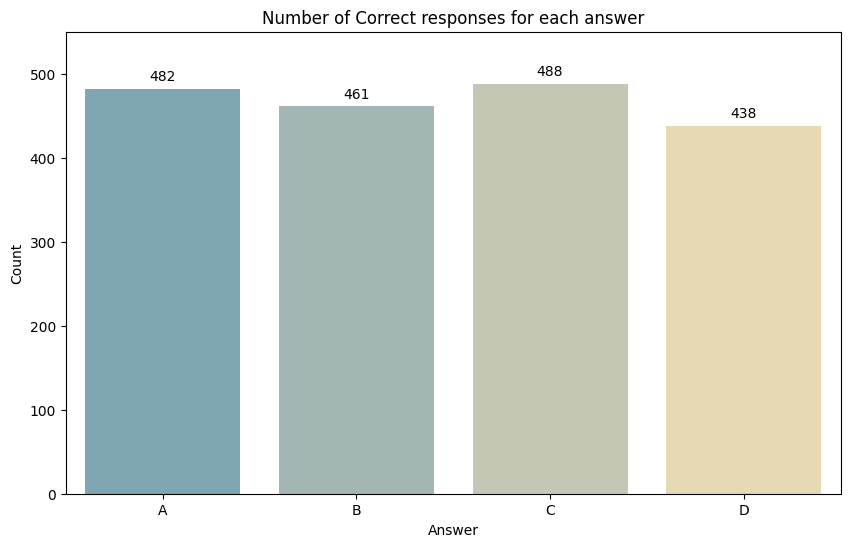

In [ ]:
# Tính tần suất xuất hiện của từng CorrectAnswer
correct_answer_freq = data['CorrectAnswer'].value_counts().reset_index()
correct_answer_freq.columns = ['CorrectAnswer', 'Frequency']

# Sắp xếp theo thứ tự bảng chữ cái
correct_answer_freq = correct_answer_freq.sort_values(by='CorrectAnswer')

# Vẽ biểu đồ cột cho CorrectAnswer
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='CorrectAnswer', y='Frequency', data=correct_answer_freq, hue='CorrectAnswer', dodge=False, palette='blend:#7AB,#EDA', legend=False)

# Thêm số vào trên mỗi cột
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

# Đặt độ cao tối đa của y-axis là 550
ax.set_ylim(0, 550)

plt.title('Number of Correct responses for each answer')
plt.xlabel('Answer')
plt.ylabel('Count')
plt.show()

***Nhận xét:***
- Số lần các đáp án là câu trả lời đúng phân bố đồng đều.

**Các ngộ nhận phổ biến**

In [ ]:
# Tạo df mới chỉ gồm các misconceptionId và đếm số lần xuất hiện của mỗi misconceptionId
data_misconception = pd.concat([data['MisconceptionAId'], data['MisconceptionBId'], data['MisconceptionCId'], data['MisconceptionDId']])
data_misconception = data_misconception.value_counts().reset_index()
data_misconception.columns = ['MisconceptionId', 'Frequency']
# Loại bỏ misconceptionId = -1 (NaN)
data_misconception = data_misconception.drop(data_misconception[data_misconception['MisconceptionId'] == -1].index)
data_misconception['MisconceptionId'] = data_misconception['MisconceptionId'].astype(int)
# Merge với misconception_mapping để lấy tên của misconception
data_misconception = pd.merge(data_misconception, mis_map, on='MisconceptionId', how='left')
# chỉ trực quan cho top 30
misconception_freq = data_misconception.head(30)

styled_frequency = misconception_freq.style.bar(subset='Frequency', color='lightsteelblue', align='left', vmin=5)
styled_frequency.set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '14px'), ('text-align', 'center')]},
     {'selector': 'td:nth-child(2)', 'props': [('width', '70px'), ('text-align', 'center')]},  # Điều chỉnh cột 'MisconceptionId'
     {'selector': 'td:nth-child(3)', 'props': [('text-align', 'left')]},  # Điều chỉnh cột 'Frequency'
     {'selector': 'td:nth-child(4)', 'props': [('text-align', 'left')]}  # Điều chỉnh cột 'Frequency'
    ]
)

styled_frequency


,MisconceptionId,Frequency,MisconceptionName
0,1214,54,"When solving an equation, uses the same operation rather than the inverse."
1,1379,43,Rounds down instead of up
2,2316,38,Mixes up squaring and multiplying by 2 or doubling
3,1507,36,Carries out operations from left to right regardless of priority order
4,1990,33,Fails to reflect across mirror line
5,1880,32,Mixes up greater than and less than symbols
6,1597,27,Believes multiplying two negatives gives a negative answer
7,2392,27,Rounds to the wrong degree of accuracy (rounds too much)
8,220,22,Only multiplies the first term in the expansion of a bracket
9,1248,22,Rounds to the wrong degree of accuracy (rounds too little)


***Nhận xét:***

Hầu hết các ngộ nhận phổ biến (gặp ở nhiều câu hỏi) tập trung vào nhóm các quy tắc tính toán cơ bản:
- Thứ tự ưu tiên của phép toán, và nhầm lẫn các phép toán, tiêu biểu như:

    + "When solving an equation, uses the same operation rather than the inverse" (54 lần).

    + "Carries out operations from left to right regardless of priority order" (36 lần).

    + "Mixes up squaring and multiplying by 2" (38 lần).

    + "Only multiplies the first term in the expansion of a bracket" (22 lần).
- Bản chất phép toán với số âm và phân số:

    + "Believes multiplying two negatives gives a negative answer" (27 lần).

    + "When adding fractions, adds the numerators and denominators" (16 lần).
- Làm tròn số

    + "Rounds down instead of up" (43 lần).

    + "Rounds to the wrong degree of accuracy" ("too much" 27+ "too little" 22 lần).
- Nhận diện và sử dụng ký hiệu toán học:

    + "Fails to reflect across mirror line" (33 lần).

    + "Mixes up greater than and less than symbols" (32 lần).
    
Ngoài ra, còn có các ngộ nhận khác về tính toán số thực, hoặc các nhóm ngộ nhận khác nhưng chỉ đặc thù cho một số nhóm kiến thức/ lĩnh vực nâng cao hơn nên có tần suất suất hiện thấp hơn.


## 4. Xem xét độ dài câu hỏi và các câu trả lời

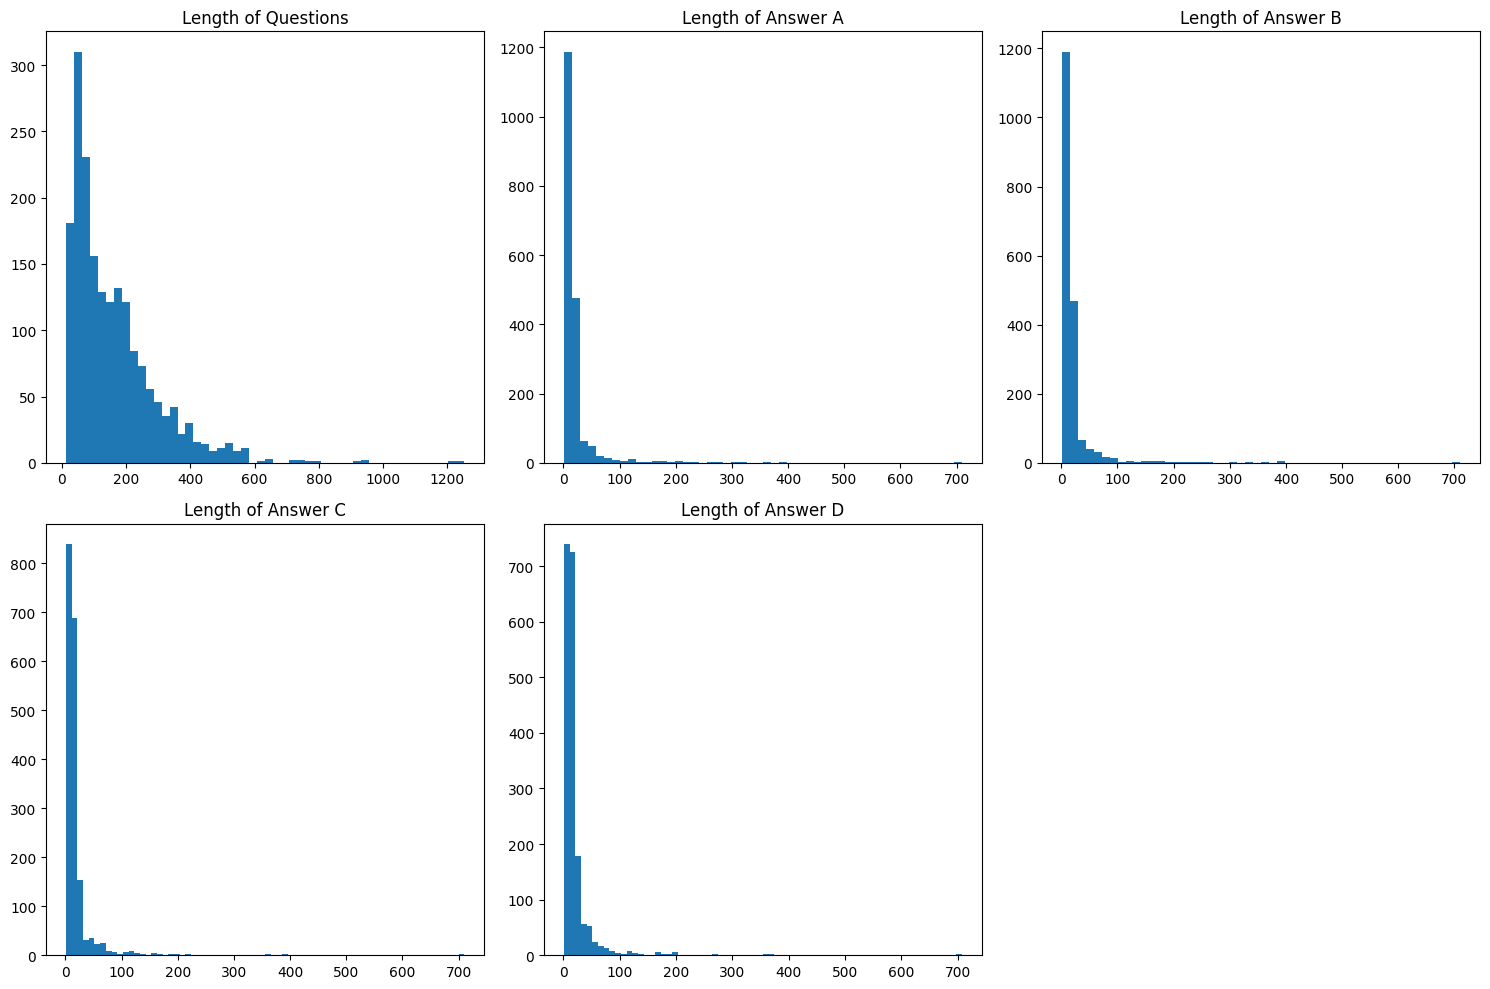

In [ ]:
data['length of questions'] = data['QuestionText'].apply(lambda x: len(x))
data['length of answer A'] = data['AnswerAText'].apply(lambda x: len(x))
data['length of answer B'] = data['AnswerBText'].apply(lambda x: len(x))
data['length of answer C'] = data['AnswerCText'].apply(lambda x: len(x))
data['length of answer D'] = data['AnswerDText'].apply(lambda x: len(x))

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].hist(data['length of questions'], bins=50)
axs[0, 0].set_title('Length of Questions')

axs[0, 1].hist(data['length of answer A'], bins=50)
axs[0, 1].set_title('Length of Answer A')

axs[0, 2].hist(data['length of answer B'], bins=50)
axs[0, 2].set_title('Length of Answer B')

axs[1, 0].hist(data['length of answer C'], bins=70)
axs[1, 0].set_title('Length of Answer C')

axs[1, 1].hist(data['length of answer D'], bins=70)
axs[1, 1].set_title('Length of Answer D')

axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


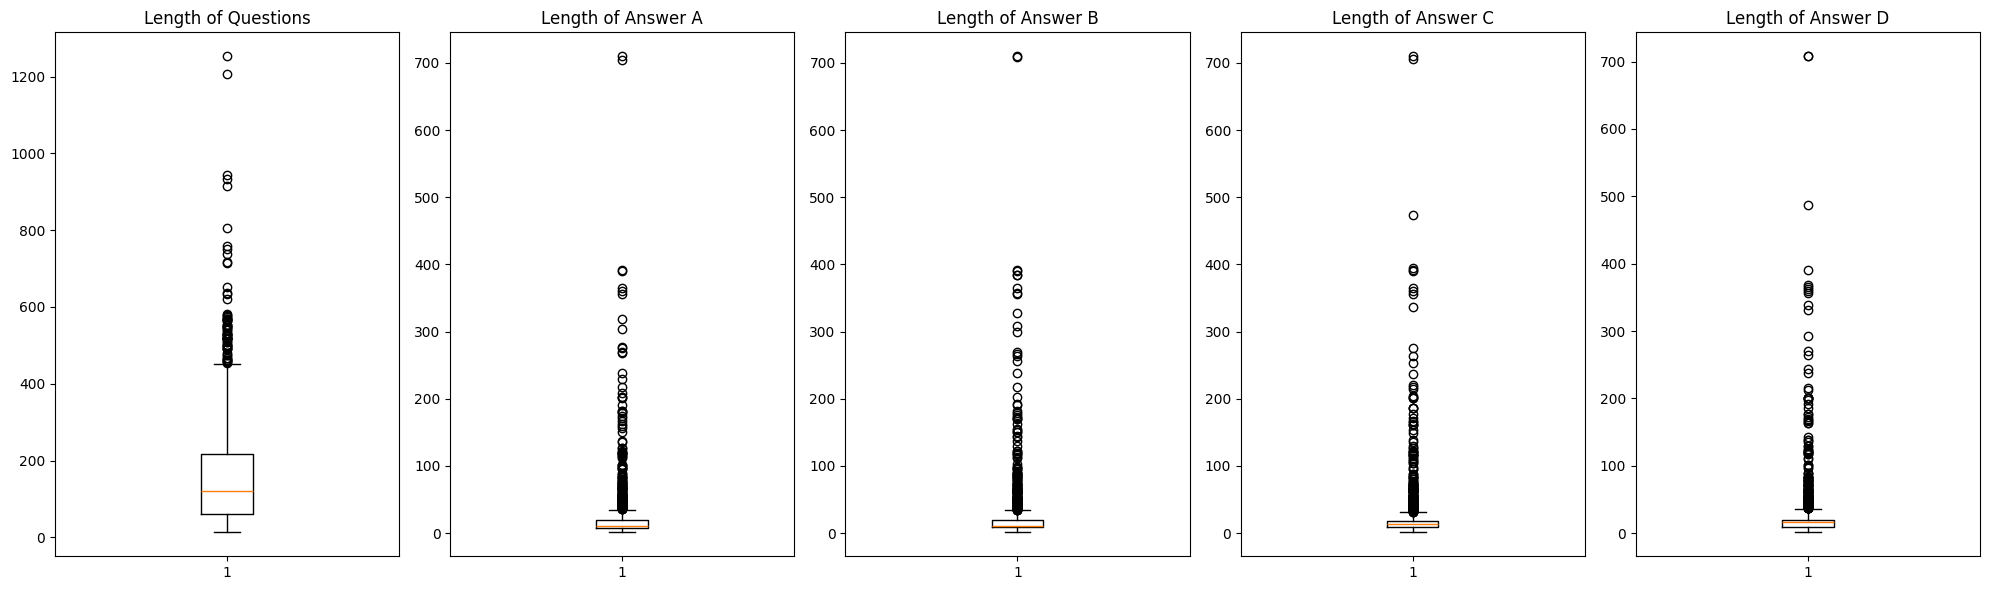

In [ ]:

# Tạo lưới 1x5 cho các boxplot
fig, axs = plt.subplots(1, 5, figsize=(20, 6))

# Vẽ boxplot cho các câu hỏi và câu trả lời
axs[0].boxplot(data['length of questions'])
axs[0].set_title('Length of Questions')

axs[1].boxplot(data['length of answer A'])
axs[1].set_title('Length of Answer A')

axs[2].boxplot(data['length of answer B'])
axs[2].set_title('Length of Answer B')

axs[3].boxplot(data['length of answer C'])
axs[3].set_title('Length of Answer C')

axs[4].boxplot(data['length of answer D'])
axs[4].set_title('Length of Answer D')

# Cải thiện cách bố trí
plt.tight_layout()

# Hiển thị các biểu đồ
plt.show()

***Nhận xét:***
- Độ dài câu hỏi: Phân bố khá rộng, có cả câu hỏi ngắn và dài, nhưng tập trung chủ yếu ở mức ngắn (dưới 200 ký tự) và trung bình (từ 200 đến 600 ký tự).
- Độ dài của các câu trả lời có phần phân tán hơn nhiều. Tập trung nhiều nhất vẫn là nhóm câu trả lời ngắn, nhưng vẫn có một số câu trả lời khá dài hoặc dài so với phần còn lại.

## 5. Nhận xét tổng quan
- Bộ dữ liệu có giá trị lớn và chứa nhiều thông tin hữu ích cho bài toán xác định mối quan hệ giữa các ngộ nhận và việc chọn đáp án sai.

- Bộ dữ liệu đa dạng về các phân môn và các phần kiến thức nền tảng trong toán học.

- Tuy nhiên, dữ liệu hiện tại hầu hết chỉ tập trung vào các bài toán với độ khó không quá cao. Hầu hết tập trung vào các phần kiến thức chung, chưa chuyên môn hoá. Vì vậy, mô hình sau khi huấn luyện có thể sẽ chạy tốt với các nhóm câu hỏi mức dễ, trung bình, khá, nhưng chưa thể giải quyết tốt được nhóm câu hỏi mức độ khó, hoặc thuộc các môn học nâng cao.

# **Trực quan câu hỏi trong bộ dữ liệu**

In [ ]:
!pip install -qq pylatexenc


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from IPython.display import display, HTML
from pylatexenc.latex2text import LatexNodes2Text
import re
from markdown import markdown


In [ ]:
def generate_question_html(df, index, mis_map, lat2text=1):
    question = df.iloc[index].QuestionText
    if lat2text:
        question_html = LatexNodes2Text().latex_to_text(question)
    else:
        question_html = question

    options = []
    for i in ['A', 'B', 'C', 'D']:
        option = df['Answer' + i + 'Text'].iloc[index]
        if lat2text:
            option_html = LatexNodes2Text().latex_to_text(option)
        else:
            option_html = option
        options.append(option_html)

    correct_answer = df.iloc[index].CorrectAnswer
    construct_name = df.iloc[index].ConstructName
    subject_name = df.iloc[index].SubjectName

    misconception_ids = [df.iloc[index]['Misconception' + i + 'Id'] for i in ['A', 'B', 'C', 'D']]
    misconceptions = mis_map[mis_map['MisconceptionId'].isin(misconception_ids)]
    misconceptions_dict = misconceptions.set_index('MisconceptionId')['MisconceptionName'].to_dict()

    # Tạo HTML
    katexInjectString = '''<link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/katex@0.16.11/dist/katex.min.css" integrity="sha384-nB0miv6/jRmo5UMMR1wu3Gz6NLsoTkbqJghGIsx//Rlm+ZU03BU6SQNC66uf4l5+" crossorigin="anonymous">
    <script type="module">
        import renderMathInElement from "https://cdn.jsdelivr.net/npm/katex@0.16.11/dist/contrib/auto-render.mjs";
        renderMathInElement(document.body);
    </script>'''

    html = f"""
    <div style='font-family: Arial, sans-serif; border: 2px solid #155E95; padding: 10px; border-radius: 15px; width: 90%; margin: 0 auto; background-color: #f4f9ff;'>

        <p style='font-size: 18px; font-weight: bold; color: #D84040;'>Problem:</p>
        <p style='font-size: 18px; color: #333; font-weight: normal;'>{katexInjectString + question_html}</p>
        <ul style='list-style-type: none; padding: 0;'>
    """

    html += """
    <div style='display: grid; grid-template-columns: repeat(2, 1fr); gap: 10px;'>
    """

    for i, option in enumerate(options):
        html += f"""
        <div style='background-color: #D9EAFD; padding: 10px; margin: 5px; border-radius: 10px;'>
            <span style='font-size: 18px;'font-weight: bold; color: #155E95;'>{chr(65 + i)}.</span> {katexInjectString + option}
        </div>
        """

    html += "</div>"

    html += f"""
        </ul>
        <p style='font-size: 18px; font-weight: bold; color: #28a745;'>Correct answer: {correct_answer}</p>
        <hr style='border: 1px solid #155E95; margin: 20px 0;'>
    """

    html += """
    <div style='display: grid; grid-template-columns: repeat(2, 1fr); gap: 20px;'>
    """

    for i, misconception_id in enumerate(misconception_ids):
        misconception_name = misconceptions_dict.get(misconception_id, "No misconception")
        html += f"""
        <p style='font-size: 18px; color: #333;'><strong>Misconception {chr(65 + i)}:</strong> {misconception_name}</p>
        """

    html += "</div>"


    html += f"""

        <hr style='border: 1px solid #155E95; margin: 5px 0;'>
        <p style='font-size: 18px; color: #155E95;'><strong>Construct Name:</strong> {construct_name}</p>
        <p style='font-size: 18px; color: #155E95;'><strong>Subject Name:</strong> {subject_name}</p>
        """
    # Hiển thị HTML
    display(HTML(html))


In [ ]:
index = np.random.randint(1, 1870)
generate_question_html(data,index,mis_map,lat2text=0)
